In [0]:
# Если предсказывать с помощью линейной регрессии, то могут появляться такие числа:
#-1, -0.2, 1.3, 0.05 ...

In [0]:
#p [0, 1]

In [0]:
#p / (1-p)

In [0]:
#0.5 / (1-0.5)

In [0]:
#0.01 / (1 - 0.01)

In [0]:
#0.9999 / (1-0.9999)

In [0]:
#p = 1-1e-10
#np.log(p / (1 - p))                       

In [0]:
#p = 0.8
#np.log(p / (1 - p))

In [0]:
#np.log(p / (1 - p)) # (-inf, +inf)

In [0]:
#W*X = np.log(p / (1 - p))

In [0]:
#z = W*X

In [0]:
#z = np.log(p / (1 - p))

In [0]:
#t = p / (1 - p) => t*(1-p) = p => t - t*p = p => t = p + t*p => t/p = 1 + t => p = t / (1 + t)

In [0]:
#p = t / (1 + t)

In [0]:
#z = np.log(t) => t = e**z => e**(W*X)

In [0]:
#p = t / (1 + t) => p = e**z / (1 + e**z) => p = 1 / (1/e**z + 1) => p = 1 / (1 + e**(-z)) => p = 1/(1 + e**(-W*X))

In [0]:
#p = 1/(1 + e**(-W*X))

In [23]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [24]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [0]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [0]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [27]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [0]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err

In [29]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [0]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [31]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [0]:
probabilities = sigmoid(z)

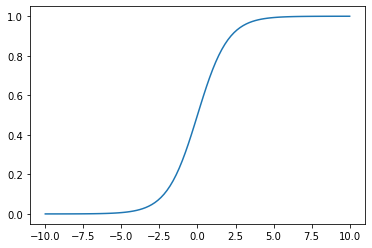

In [33]:
plt.plot(z, probabilities)

In [0]:
### Logistic Regression

In [0]:
def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [36]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-4)

100 [ 0.49282748 -0.15007528  0.64748973  1.51727915] 1.2014814214705334
200 [ 0.48896219 -0.16184918  0.64728128  1.51155738] 1.1828456288538924
300 [ 0.48511874 -0.17358386  0.64706349  1.50586552] 1.1643525542846556
400 [ 0.4812976  -0.18527698  0.64683669  1.50020462] 1.1460086359433084
500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
600 [ 0.47372426 -0.20852799  0.6463577   1.48898028] 1.109796908143704
700 [ 0.46997312 -0.22007992  0.6461065   1.48341934] 1.0919450148769096
800 [ 0.46624642 -0.23157833  0.64584825  1.47789438] 1.074274212586137
900 [ 0.46254476 -0.24301946  0.64558365  1.4724069 ] 1.0567942835649755
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489


In [0]:
from sklearn.linear_model import LogisticRegression as LR

In [0]:
LR?

# Домашнее задание

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res
def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

1*.  Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [0]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred+1e-10) + (1.0 - y) * np.log(1.0 - y_pred+1e-10))
  return err

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [52]:
def eval_model_error(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
  return err

log_loss = 1e10
alpha_found = 0
iters_found = 0
for i in range(1000,20000, 1000):
  for exponent in range(-10, 0, 1):
    alpha = 10**exponent
    error = eval_model_error(X_st, y, iterations = i, alpha=alpha)
    if error < log_loss:
      print(f"Found less error {error}, iters = {i}, alpha = {alpha}")
      log_loss = error
      alpha_found = alpha
      iters_found = i
print(f"Minimal error: {log_loss}, where alpha = {alpha_found}, iters = {iters_found}")


Found less error 1.2200654377556572, iters = 1000, alpha = 1e-10
Found less error 1.2200637440771303, iters = 1000, alpha = 1e-09
Found less error 1.2200468073498554, iters = 1000, alpha = 1e-08
Found less error 1.2198774459162733, iters = 1000, alpha = 1e-07
Found less error 1.218184416268653, iters = 1000, alpha = 1e-06
Found less error 1.201313379260077, iters = 1000, alpha = 1e-05
Found less error 1.0395158238195779, iters = 1000, alpha = 0.0001
Found less error 0.5906912247964502, iters = 1000, alpha = 0.001
Found less error 0.5233765329934374, iters = 1000, alpha = 0.01
Found less error 0.40587815254267917, iters = 1000, alpha = 0.1
Found less error 0.3533392417797235, iters = 2000, alpha = 0.1
Found less error 0.3250134759996325, iters = 3000, alpha = 0.1
Found less error 0.30662418769067357, iters = 4000, alpha = 0.1
Found less error 0.29312446740611897, iters = 5000, alpha = 0.1
Found less error 0.28239334029146324, iters = 6000, alpha = 0.1
Found less error 0.2734038241694626

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [60]:
def calc_pred_proba(W, X):
  res = 1 / (1 + np.exp(-np.dot(W, X)))
  return res

W = eval_model(X_st, y, iterations = 19000, alpha=0.1)


print(y)
calc_pred_proba(W, X_st)

1900 [-4.43701382 -1.03145163 -0.07991295  4.34192367] 0.3571160300912122
3800 [-6.76616404 -1.1324736  -0.92014818  5.98555802] 0.3098105947824771
5700 [-8.41806953 -1.23742252 -1.47303961  7.23895339] 0.28539549779716683
7600 [-9.77760165 -1.33648213 -1.91176531  8.30368705] 0.2686044740590886
9500 [-10.97597381  -1.42974282  -2.29038963   9.25698967] 0.2554502533028652
11400 [-12.06932029  -1.51800502  -2.63108122  10.13404739] 0.24445178477328908
13300 [-13.08576251  -1.60192235  -2.94468649  10.95327685] 0.23492323668930548
15200 [-14.04121839  -1.68198332  -3.23724692  11.72549426] 0.22649308298705137
17100 [-14.9456676   -1.75856367  -3.51249954  12.45771224] 0.21893422955793485
19000 [-15.80593544  -1.8319657   -3.77296727  13.15487458] 0.2120940863220865
[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


array([0.31279885, 0.08760297, 0.99981419, 0.17290696, 0.78784041,
       0.21595583, 0.99996999, 0.0668284 , 0.40178856, 0.99870165])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [0]:
def calc_pred(W, X, threshold=0.5):
  res = calc_pred_proba(W,X)
  return np.where(res>threshold,1.0,0.0)

y_pred = calc_pred(W, X_st)

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [90]:
def count_accuracy(y, y_pred):
  return np.sum(y == y_pred)/y.shape[0]

def count_precision(y,y_pred):
  TP = np.sum((y==y_pred) & (y==1))
  FP = np.sum((y==y_pred) & (y==0) & (y_pred==1))
  return TP/(TP+FP)

def count_recall(y,y_pred):
  TP = np.sum((y==y_pred) & (y==1))
  FN = np.sum((y==1) & (y_pred==0))
  return TP/(TP+FN)

def count_F1(y, y_pred):
  precision = count_precision(y,y_pred)
  recall = count_recall(y,y_pred)
  return 2*(precision*recall)/(precision+recall)

def count_matrix(y,y_pred):
  TP = np.sum((y==y_pred) & (y==1))
  FN = np.sum((y==1) & (y_pred==0))
  FP = np.sum((y==y_pred) & (y==0) & (y_pred==1))
  TN = np.sum((y==y_pred) & (y==0))
  print(" ", "+1" ,"-1")
  print("+1", TP, FP)
  print("-1", FN, TN)
  return np.array([[TP, FP], [FN, TN]])

print(y)
print(y_pred)

accuracy = count_accuracy(y,y_pred)
precision = count_precision(y,y_pred)
recall = count_recall(y,y_pred)
f1 = count_F1(y, y_pred)

print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, F1 = {f1}")
count_matrix(y, y_pred)

[0. 0. 1. 0. 1. 0. 1. 0. 1. 1.]
[0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
accuracy = 0.9, precision = 1.0, recall = 0.8, F1 = 0.888888888888889
  +1 -1
+1 4 0
-1 1 5


array([[4, 0],
       [1, 5]])

6. Могла ли модель переобучиться? Почему?

Могла, мы ведь не использовали регуляризацию

7. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [0]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-2):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T) + lambda_/2 * np.sign(W))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-2):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * 2* np.dot((y_pred - y), X.T) + lambda_*W)
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W